In [1]:
# 准备数据

print("blabla...")

import paddle as paddle
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os


import os
import shutil
import paddle as paddle
import paddle.fluid as fluid
from paddle.fluid.param_attr import ParamAttr

# 第一步：数据预处理
import os
import json

# 定义公共变量
name_dict = {"apple":0, "banana":1, "grape":2,
             "orange":3, "pear":4}
data_root_path = "work/fruit/fruits/"#数据集路径

test_file_path = data_root_path + "test.txt" #测试数据集文件
trainer_file_path = data_root_path + "trainer.txt"  #训练数据集文件
readme_file = data_root_path + "readme.json"

name_data_list = {} # 记录每类图像有多少训练图片、测试图片

def save_train_test_file(path, name):
    if name not in name_data_list:
        img_list = []
        img_list.append(path) 
        name_data_list[name] = img_list 
    else:
        name_data_list[name].append(path) 


# 分训练集、测试集
dirs = os.listdir(data_root_path) 
for d in dirs:
    full_path = data_root_path + d 
    if os.path.isdir(full_path): 
        imgs = os.listdir(full_path) 
        for img in imgs: 
            save_train_test_file(full_path + "/" + img, d)
    else: 
        pass

# 写入测试集/训练集文件
with open(test_file_path, "w") as f: 
    pass
with open(trainer_file_path, "w") as f: 
    pass

# 分数据
for name, img_list in name_data_list.items():
    i = 0
    num = len(img_list)
    print("%s: %d张" % (name, num))
    for img in img_list:
        if i % 10 == 0: 
            with open(test_file_path, "a") as f:
                line = "%s\t%d\n" % (img, name_dict[name])
                f.write(line)
        else:
            with open(trainer_file_path, "a") as f:
                line = "%s\t%d\n" % (img, name_dict[name])
                f.write(line)
        i += 1

print('文件准备完成')


blabla...
pear: 251张
grape: 216张
apple: 288张
banana: 275张
orange: 276张
文件准备完成


blabla...
ika
pass:0,batch:0,cost:1.654501,acc:0.281250
pass:1,batch:0,cost:1.094235,acc:0.546875
pass:2,batch:0,cost:0.869451,acc:0.671875
pass:3,batch:0,cost:0.781288,acc:0.625000
pass:4,batch:0,cost:0.458932,acc:0.843750
pass:5,batch:0,cost:0.494673,acc:0.812500
pass:6,batch:0,cost:0.345369,acc:0.875000
pass:7,batch:0,cost:0.397865,acc:0.828125
pass:8,batch:0,cost:0.192190,acc:0.937500
pass:9,batch:0,cost:0.267191,acc:0.890625
pass:10,batch:0,cost:0.500373,acc:0.859375
pass:11,batch:0,cost:0.340030,acc:0.921875
pass:12,batch:0,cost:0.129355,acc:0.968750
pass:13,batch:0,cost:0.235301,acc:0.906250
pass:14,batch:0,cost:0.139040,acc:0.937500
pass:15,batch:0,cost:0.203595,acc:0.937500
pass:16,batch:0,cost:0.257415,acc:0.937500
pass:17,batch:0,cost:0.193349,acc:0.906250
pass:18,batch:0,cost:0.201333,acc:0.953125
pass:19,batch:0,cost:0.188919,acc:0.953125
pass:20,batch:0,cost:0.066696,acc:1.000000
pass:21,batch:0,cost:0.107011,acc:0.968750
pass:22,batch:0,cost:0.076593,acc:0.968750
pass:23

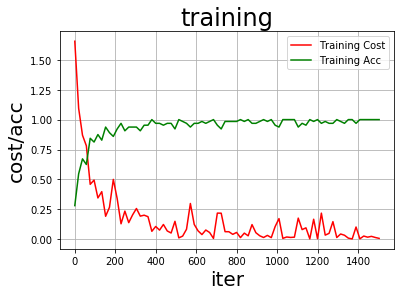

In [2]:
# 训练模型

print("blabla...")

import paddle as paddle
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import paddle.dataset.flowers as flowers
from paddle.fluid.param_attr import ParamAttr

import paddle
import paddle.fluid as fluid
import numpy as np
import sys
from multiprocessing import cpu_count
import matplotlib.pyplot as mp
print('ika')

#trainer_file_path = "work/fruit/fruits/trainer.txt"

def train_mapper(sample):
    img, label = sample 
    if not os.path.exists(img):
        print('图片不存在:',img)
    else:
        img = paddle.dataset.image.load_image(img)
        # 对图片进行变换，修剪，输出(3,100,100)
        img = paddle.dataset.image.simple_transform(
            im=img,resize_size=100,crop_size=100,
            is_color=True,is_train=True
        )
        # 将值压缩到0~1之间,每个像素点的值除以255
        img = img.flatten().astype('float32') / 255.0
        return img, label

# reader，从训练集读取数据
def train_r(train_list,buffered_size=1042):
    def reader():
        with open(train_list,'r') as f:
            lines = [line.strip() for line in f]
            for line in lines:
                img_path, lab = line.strip().split('\t')
                yield img_path, int(lab)

    return paddle.reader.xmap_readers(
        train_mapper,
        reader,
        cpu_count(),
        buffered_size,
    )

class MobileNetV2():
    def __init__(self):
        pass

    def net(self, input, class_dim=5, scale=1.0):

        # 第一层conv2d
        input = self.conv_bn_layer(
            input,
            num_filters=int(32 * scale),
            filter_size=3,
            stride=2,
            padding=1,
            if_act=True,
            name='conv1_1')

        # bn参数表
        bottleneck_params_list = [
            (1, 16, 1, 1),
            (6, 24, 2, 2),
            (6, 32, 3, 2),
            (6, 64, 4, 2),
            (6, 96, 3, 1),
            (6, 160, 3, 2),
            (6, 320, 1, 1),
        ]

        # 7组17层bottleneck模块
        i = 1
        in_c = int(32 * scale)
        for layer_setting in bottleneck_params_list:
            t, c, n, s = layer_setting
            i += 1
            input = self.invresi_blocks(
                input=input,
                in_c=in_c,
                t=t,
                c=int(c * scale),
                n=n,
                s=s,
                name='conv' + str(i))
            in_c = int(c * scale)

        # 第二层conv2d
        input = self.conv_bn_layer(
            input=input,
            num_filters=int(1280 * scale) if scale > 1.0 else 1280,
            filter_size=1,
            stride=1,
            padding=0,
            if_act=True,
            name='conv9')

        # 平均池化
        input = fluid.layers.pool2d(
            input=input,
            pool_size=7,
            pool_stride=1,
            pool_type='avg',
            global_pooling=True)
        
        # 输出
        output = fluid.layers.fc(input=input,
                                 size=class_dim,
                                 act="softmax",
                                 param_attr=ParamAttr(name='fc10_weights'),
                                 bias_attr=ParamAttr(name='fc10_offset'))
        return output

    def conv_bn_layer(self,
                      input,
                      filter_size,
                      num_filters,
                      stride,
                      padding,
                      channels=None,
                      num_groups=1,
                      if_act=True,
                      name=None,
                      use_cudnn=True):
        conv = fluid.layers.conv2d(
            input=input,
            num_filters=num_filters,
            filter_size=filter_size,
            stride=stride,
            padding=padding,
            groups=num_groups,
            act=None,
            use_cudnn=use_cudnn,
            param_attr=ParamAttr(name=name + '_weights'),
            bias_attr=False)
        bn_name = name + '_bn'
        bn = fluid.layers.batch_norm(
            input=conv,
            param_attr=ParamAttr(name=bn_name + "_scale"),
            bias_attr=ParamAttr(name=bn_name + "_offset"),
            moving_mean_name=bn_name + '_mean',
            moving_variance_name=bn_name + '_variance')
        if if_act:
            return fluid.layers.relu6(bn)
        else:
            return bn

    def shortcut(self, input, data_residual):
        return fluid.layers.elementwise_add(input, data_residual)

    def inverted_residual_unit(self,
                               input,
                               num_in_filter,
                               num_filters,
                               ifshortcut,
                               stride,
                               filter_size,
                               padding,
                               expansion_factor,
                               name=None):
        num_expfilter = int(round(num_in_filter * expansion_factor))

        channel_expand = self.conv_bn_layer(
            input=input,
            num_filters=num_expfilter,
            filter_size=1,
            stride=1,
            padding=0,
            num_groups=1,
            if_act=True,
            name=name + '_expand')

        bottleneck_conv = self.conv_bn_layer(
            input=channel_expand,
            num_filters=num_expfilter,
            filter_size=filter_size,
            stride=stride,
            padding=padding,
            num_groups=num_expfilter,
            if_act=True,
            name=name + '_dwise',
            use_cudnn=False)

        linear_out = self.conv_bn_layer(
            input=bottleneck_conv,
            num_filters=num_filters,
            filter_size=1,
            stride=1,
            padding=0,
            num_groups=1,
            if_act=False,
            name=name + '_linear')
        if ifshortcut:
            out = self.shortcut(input=input, data_residual=linear_out)
            return out
        else:
            return linear_out

    def invresi_blocks(self, input, in_c, t, c, n, s, name=None):
        first_block = self.inverted_residual_unit(
            input=input,
            num_in_filter=in_c,
            num_filters=c,
            ifshortcut=False,
            stride=s,
            filter_size=3,
            padding=1,
            expansion_factor=t,
            name=name + '_1')

        last_residual_block = first_block
        last_c = c

        for i in range(1, n):
            last_residual_block = self.inverted_residual_unit(
                input=last_residual_block,
                num_in_filter=last_c,
                num_filters=c,
                ifshortcut=True,
                stride=1,
                filter_size=3,
                padding=1,
                expansion_factor=t,
                name=name + '_' + str(i + 1))
        return last_residual_block
  

#执行训练
BATCN_SIZE = 64
trainer_reader = train_r(train_list=trainer_file_path)
train_reader = paddle.batch(paddle.reader.shuffle(
    reader=trainer_reader,
    buf_size=1200),
    batch_size=BATCN_SIZE)
    
#训练时的输入数据
image = fluid.layers.data(
    name='image',
    shape=[3,100,100],#RBG三通道彩色图
    dtype='float32'
)
#训练时期望的输出值(真实类别)
label = fluid.layers.data(
    name='label',
    shape=[1],
    dtype='int64'
)

model = MobileNetV2()
predict = model.net(
    input = image,
    class_dim = 5 
)

cost = fluid.layers.cross_entropy(
    input=predict,# 预测值
    label=label # 期望值
)

avg_cost = fluid.layers.mean(cost)

# 准确率
accuracy = fluid.layers.accuracy(input=predict,label=label)

#定义优化器:自适应梯度下降优化器
optimizer = fluid.optimizer.Adam(learning_rate=0.001)
optimizer.minimize(avg_cost)

#定义执行器
place = fluid.CUDAPlace(0) # GPU上执行
exe = fluid.Executor(place)
exe.run(fluid.default_startup_program())
feeder = fluid.DataFeeder(feed_list=[image,label],
                          place=place)

costs = []  # 记录损失值
accs = []  # 记录准确率
times = 0
batches = []  # 记录迭代次数

for pass_id in range(80):#训练80轮
    train_cost = 0
    for batch_id,data in enumerate(train_reader()):
        times = times+1
        train_cost,train_acc=exe.run(
            program=fluid.default_main_program(),#执行默认program
            feed=feeder.feed(data),#输入数据
            fetch_list=[avg_cost,accuracy]#获得结果
        )
        if batch_id % 20 == 0:
            print('pass:%d,batch:%d,cost:%f,acc:%f' %
                  (pass_id,batch_id,train_cost[0],train_acc[0]))
            accs.append(train_acc[0])  # 记录准确率
            costs.append(train_cost[0])  # 记录损失值
            batches.append(times)  # 记录迭代次数

print('训练完成!')

#保存模型
model_save_dir = 'model/fruits/'
if not os.path.exists(model_save_dir):
    os.mkdir(model_save_dir)
fluid.io.save_inference_model(
    dirname=model_save_dir,
    feeded_var_names=['image'],
    target_vars=[predict],
    executor=exe
)
print('保存模型完成!')

# 训练过程可视化
plt.title("training", fontsize=24)
plt.xlabel("iter", fontsize=20)
plt.ylabel("cost/acc", fontsize=20)
plt.plot(batches, costs, color='red', label="Training Cost")
plt.plot(batches, accs, color='green', label="Training Acc")
plt.legend()
plt.grid()
plt.savefig("train.png")
plt.show()

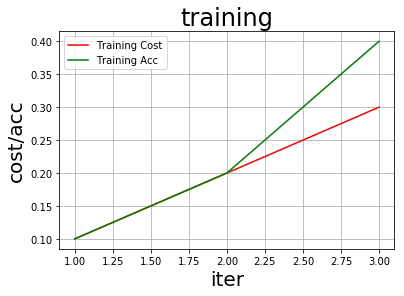

In [ ]:
costs = [0.1,0.2,0.3]  # 记录损失值
accs = [0.1,0.2,0.4]  # 记录准确率
times = 0
batches = [1,2,3]  # 记录迭代次数

plt.title("training", fontsize=24)
plt.xlabel("iter", fontsize=20)
plt.ylabel("cost/acc", fontsize=20)
plt.plot(batches, costs, color='red', label="Training Cost")
plt.plot(batches, accs, color='green', label="Training Acc")
plt.legend()
plt.grid()
plt.savefig("train.png")
plt.show()

In [ ]:
# 解压数据集
import zipfile

# zip_src: 需要解压的文件路径
# dst_dir: 解压后文件存放路径
def unzip_file(zip_src, dst_dir):
	r = zipfile.is_zipfile(zip_src)
	if r:
		fz = zipfile.ZipFile(zip_src, 'r')
		for file in fz.namelist():
			fz.extract(file, dst_dir)
	else:
		print('This is not a zip file !!!')


unzip_file('./data/data16832/fruits.zip', './work/fruit')

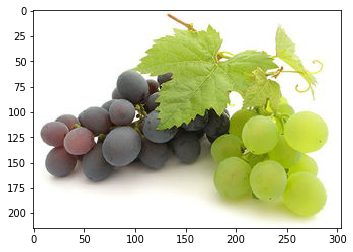

[array([[4.8821272e-07, 3.8846597e-06, 9.9997616e-01, 5.7424609e-07,
        1.8818402e-05]], dtype=float32)]
预测结果: grape


In [3]:
#执行预测
from PIL import Image

import paddle
import paddle.fluid as fluid
import numpy as np
import sys
from multiprocessing import cpu_count
import matplotlib.pyplot as mp

place = fluid.CPUPlace()#预测不需要再GPU上运行
infer_exe = fluid.Executor(place)



#读取图片，调整尺寸，归一化处理
def load_image(path):
    img = paddle.dataset.image.load_and_transform(
        path,100,100,False).astype('float32')
    img = img / 255.0 #归一化处理，像素值压缩到0~1
    return img

infer_imgs = [] 
test_img = 'work/fruit/fruits/grape/82.jpg'
infer_imgs.append(load_image(test_img))
infer_imgs = np.array(infer_imgs)
#加载模型
[infer_program,feed_target_names,fetch_targets] = \
fluid.io.load_inference_model(model_save_dir,infer_exe)
#显示原始图片
img = Image.open(test_img)#打开图片
mp.imshow(img)
mp.show()
#执行预测
results = infer_exe.run(infer_program,
                       feed={feed_target_names[0]:infer_imgs},
                       fetch_list=fetch_targets
                       )
print(results)#result为数组，包含每一个类别的概率
result = np.argmax(results[0])#获取最大索引值
for k, v in name_dict.items():#根据字典预测结果的名称
    if result == v:
        print('预测结果:',k)

In [47]:
# 评价模型性能
from PIL import Image
import paddle
import paddle.fluid as fluid
import numpy as np
import sys
from multiprocessing import cpu_count
import matplotlib.pyplot as mp

# place = fluid.CPUPlace() # CPU上运行
place = fluid.CUDAPlace(0)
infer_exe = fluid.Executor(place)

data_dir = "work/fruit/fruits"    
eval_file = "test.txt"    

# 读取图片，调整尺寸
def load_image(path):
    img = paddle.dataset.image.load_and_transform(
        path,100,100,False).astype('float32')
    img = img / 255.0 # 像素值压缩到0~1
    return img

# 推测函数
def infer(path):    
    timg = load_image(path)    
    infer_imgs = [] 
    infer_imgs.append(load_image(path))
    infer_imgs = np.array(infer_imgs)

    results = infer_exe.run(infer_program,
                       feed={feed_target_names[0]:infer_imgs},
                       fetch_list=fetch_targets
                       )
    # print(results) 
    return np.argmax(results[0])    

# 评估函数
def eval_all():    
    eval_file_path = os.path.join(data_dir, eval_file)    
    total_count = 0    
    right_count = 0    
    with codecs.open(eval_file_path, encoding='utf-8') as flist:     
        lines = [line.strip() for line in flist]    
        t1 = time.time()    
        for line in lines:    
            total_count += 1    
            parts = line.strip().split()  
            result = infer(parts[0])    
            # print("infer result:{0} answer:{1}".format(result, parts[1]))    
            if str(result) == parts[1]:    
                right_count += 1  
                # print('Yes!')  
        period = time.time() - t1 
        print("MobileNetV2")   
        print("总测试样本数:{0} \n耗时:{1} \n准确率:{2}".format(total_count,"%2.2f sec" % period, right_count / total_count))  
        avgt = period / total_count
        fps = 1 / avgt
        avgt *= 1000
        print("平均预测时间 :{0}".format("%2.5f ms" % avgt))
        print("FPS:{0}".format("%2.5f " % fps))

# 加载模型
[infer_program,feed_target_names,fetch_targets] = \
fluid.io.load_inference_model(model_save_dir,infer_exe)

eval_all()

MobileNetV2
总测试样本数:133 
耗时:3.22 sec 
准确率:0.9849624060150376
平均预测时间 :24.20908 ms
FPS:41.30682 


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

In [ ]:
# 训练模型 可用备份

print("blabla...")

import paddle as paddle
import paddle.fluid as fluid
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import shutil
import paddle.dataset.flowers as flowers
from paddle.fluid.param_attr import ParamAttr

import paddle
import paddle.fluid as fluid
import numpy as np
import sys
from multiprocessing import cpu_count
import matplotlib.pyplot as mp
print('ika')


#trainer_file_path = "work/fruit/fruits/trainer.txt"

#将传入的图像拆成两部分，一部分图片数据，另一部分是所属的类别
def train_mapper(sample):
    img, label = sample #sample由图片路径、标记组成的
    if not os.path.exists(img):
        print('图片不存在:',img)
    else:
        #读取图片，并且对图片做维度变化
        img = paddle.dataset.image.load_image(img)
        #对图片进行变换，修剪，输出(3,100,100)的矩阵
        img = paddle.dataset.image.simple_transform(
            im=img,resize_size=100,crop_size=100,
            is_color=True,is_train=True
        )
        #图像归一化处理，将值压缩到0~1之间,每个像素点的值除以255
        img = img.flatten().astype('float32') / 255.0
        return img, label

#自定义reader，从训练集读取数据，并交给train_mapper处理
def train_r(train_list,buffered_size=1042):
    def reader():
        with open(train_list,'r') as f:
            lines = [line.strip() for line in f]
            for line in lines:
                img_path, lab = line.strip().split('\t')
                yield img_path, int(lab)

    return paddle.reader.xmap_readers(
        train_mapper,#mapper函数
        reader,#reader
        cpu_count(),#线程数
        buffered_size,#缓冲区大小
    )

#######################################################################################################
# MyCNN
# 输入层--->卷积--池化层/dropout--->卷积--池化层/dropout--->
# 卷积--池化层/dropout--->全连接层---->dropout---->全连接层
def CNN(image,type_size):
    #第一个卷积池化层
    conv_pool_1 = fluid.nets.simple_img_conv_pool(
        input=image,#输入数据
        filter_size=3,#卷积核大小3x3
        num_filters=32,#卷积核数量，与输出通道数相同
        pool_size=2,#池化矩阵大小2x2
        pool_stride=2,#池化层步长
        act='relu'#激活函数
    )
    #dropout丢弃学习，随机丢弃一些神经元的输出，防止过拟合
    drop = fluid.layers.dropout(x=conv_pool_1,#输入
                                dropout_prob=0.5)#丢弃率

    # 第二个卷积池化层
    conv_pool_2 = fluid.nets.simple_img_conv_pool(
        input=drop,  # 输入数据
        filter_size=3,  # 卷积核大小3x3
        num_filters=64,  # 卷积核数量，与输出通道数相同
        pool_size=2,  # 池化矩阵大小2x2
        pool_stride=2,  # 池化层步长
        act='relu'  # 激活函数
    )
    drop = fluid.layers.dropout(x=conv_pool_2,  # 输入
                                dropout_prob=0.5)  # 丢弃率

    # 第三个卷积池化层
    conv_pool_3 = fluid.nets.simple_img_conv_pool(
        input=drop,  # 输入数据
        filter_size=3,  # 卷积核大小3x3
        num_filters=64,  # 卷积核数量，与输出通道数相同
        pool_size=2,  # 池化矩阵大小2x2
        pool_stride=2,  # 池化层步长
        act='relu'  # 激活函数
    )
    drop = fluid.layers.dropout(x=conv_pool_3,  # 输入
                                dropout_prob=0.5)  # 丢弃率
    
    # 第四个卷积池化层
    conv_pool_4 = fluid.nets.simple_img_conv_pool(
        input=drop,  # 输入数据
        filter_size=3,  # 卷积核大小3x3
        num_filters=64,  # 卷积核数量，与输出通道数相同
        pool_size=2,  # 池化矩阵大小2x2
        pool_stride=2,  # 池化层步长
        act='relu'  # 激活函数
    )
    drop = fluid.layers.dropout(x=conv_pool_3,  # 输入
                                dropout_prob=0.5)  # 丢弃率


    #全连接层,起到输出分类的作用
    fc = fluid.layers.fc(input=drop,
                         size=512,
                         act='relu')

    drop = fluid.layers.dropout(x=fc,
                                dropout_prob=0.5)

    predict = fluid.layers.fc(
        input=drop,#输入层
        size=type_size,#最终的分类个数
        act='softmax'#激活函数
    )
    return predict
################################################################################################################
# VGG16
def vgg_bn_drop(image, type_size):
    def conv_block(ipt, num_filter, groups, dropouts):
        # 创建Convolution2d, BatchNorm, DropOut, Pool2d组
        return fluid.nets.img_conv_group(input=ipt, # 输入图像像，[N,C,H,W]格式
                                         pool_stride=2, # 池化步长值
                                         pool_size=2, # 池化区域大小
                                         conv_num_filter=[num_filter] * groups, #卷积核数量
                                         conv_filter_size=3, # 卷积核大小
                                         conv_act="relu", # 激活函数
                                         conv_with_batchnorm=True,#是否使用batch normal
                                         pool_type="max") # 池化类型
    conv1 = conv_block(image, 64, 2, [0.0, 0]) # 最后一个参数个数和组数量相对应
    conv2 = conv_block(conv1, 128, 2, [0.0, 0])
    conv3 = conv_block(conv2, 256, 3, [0.0, 0.0, 0.0])
    conv4 = conv_block(conv3, 512, 3, [0.0, 0.0, 0.0])
    conv5 = conv_block(conv4, 512, 3, [0.0, 0.0, 0.0])

    drop = fluid.layers.dropout(x=conv5, dropout_prob=0.2) # 待调整
    fc1 = fluid.layers.fc(input=drop, size=512, act=None)

    bn = fluid.layers.batch_norm(input=fc1, act="relu") # batch normal
    drop2 = fluid.layers.dropout(x=bn, dropout_prob=0.0)
    fc2 = fluid.layers.fc(input=drop2, size=512, act=None)
    predict = fluid.layers.fc(input=fc2, size=type_size, act="softmax")

    return predict
def Vgg(image, type_size):
    input = image
    def conv_block(ipt, num_filter, groups, dropouts):
        return fluid.nets.img_conv_group(
            input=ipt,
            pool_size=2,
            pool_stride=2,
            conv_num_filter=[num_filter]*groups,
            conv_act='relu',
            conv_with_batchnorm=True,
            conv_batchnorm_drop_rate=dropouts,
            pool_type='max'
        )
    
    conv1 = conv_block(input, 64, 2, [0.3, 0])
    conv2 = conv_block(conv1, 128, 2, [0.4, 0])
    conv3 = conv_block(conv2, 256, 3, [0.4, 0.4, 0])
    conv4 = conv_block(conv3, 512, 3, [0.4, 0.4, 0])
    conv5 = conv_block(conv4, 512, 3, [0.4, 0.4, 0])

    drop = fluid.layers.dropout(x=conv5, dropout_prob=0.5)

    fc1 = fluid.layers.fc(input=drop, size=512, act=None)
    bn = fluid.layers.batch_norm(input=fc1, act='relu')
    drop2 = fluid.layers.dropout(x=bn, dropout_prob=0.5)
    fc2 = fluid.layers.fc(input=drop2, size=512, act=None)
    predict = fluid.layers.fc(input=fc2, size=type_size, act='softmax')

    return predict
###########################################################################################################
# ResNet50
def resnet50(input, class_dim):
    def conv_bn_layer(input, num_filters, filter_size, stride=1, groups=1, act=None, name=None):
        conv = fluid.layers.conv2d(input=input,
                                   num_filters=num_filters,
                                   filter_size=filter_size,
                                   stride=stride,
                                   padding=(filter_size - 1) // 2,
                                   groups=groups,
                                   act=None,
                                   param_attr=ParamAttr(name=name + "_weights"),
                                   bias_attr=False,
                                   name=name + '.conv2d.output.1')
        if name == "conv1":
            bn_name = "bn_" + name
        else:
            bn_name = "bn" + name[3:]
        return fluid.layers.batch_norm(input=conv,
                                       act=act,
                                       name=bn_name + '.output.1',
                                       param_attr=ParamAttr(name=bn_name + '_scale'),
                                       bias_attr=ParamAttr(bn_name + '_offset'),
                                       moving_mean_name=bn_name + '_mean',
                                       moving_variance_name=bn_name + '_variance', )

    def shortcut(input, ch_out, stride, name):
        ch_in = input.shape[1]
        if ch_in != ch_out or stride != 1:
            return conv_bn_layer(input, ch_out, 1, stride, name=name)
        else:
            return input

    def bottleneck_block(input, num_filters, stride, name):
        conv0 = conv_bn_layer(input=input,
                              num_filters=num_filters,
                              filter_size=1,
                              act='relu',
                              name=name + "_branch2a")
        conv1 = conv_bn_layer(input=conv0,
                              num_filters=num_filters,
                              filter_size=3,
                              stride=stride,
                              act='relu',
                              name=name + "_branch2b")
        conv2 = conv_bn_layer(input=conv1,
                              num_filters=num_filters * 4,
                              filter_size=1,
                              act=None,
                              name=name + "_branch2c")

        short = shortcut(input, num_filters * 4, stride, name=name + "_branch1")

        return fluid.layers.elementwise_add(x=short, y=conv2, act='relu', name=name + ".add.output.5")

    depth = [3, 4, 6, 3]
    num_filters = [64, 128, 256, 512]

    conv = conv_bn_layer(input=input, num_filters=64, filter_size=7, stride=2, act='relu', name="conv1")
    conv = fluid.layers.pool2d(input=conv, pool_size=3, pool_stride=2, pool_padding=1, pool_type='max')

    for block in range(len(depth)):
        for i in range(depth[block]):
            conv_name = "res" + str(block + 2) + chr(97 + i)
            conv = bottleneck_block(input=conv,
                                    num_filters=num_filters[block],
                                    stride=2 if i == 0 and block != 0 else 1,
                                    name=conv_name)

    pool = fluid.layers.pool2d(input=conv, pool_size=7, pool_type='avg', global_pooling=True)
    output = fluid.layers.fc(input=pool, size=class_dim, act='softmax')
    return output
##############################################################################################################
# MobileNetV2
def conv_bn_layer(input, filter_size, num_filters, stride,
                  padding, channels=None, num_groups=1, act='relu', use_cudnn=True):
    conv = fluid.layers.conv2d(input=input,
                               num_filters=num_filters,
                               filter_size=filter_size,
                               stride=stride,
                               padding=padding,
                               groups=num_groups,
                               act=None,
                               use_cudnn=use_cudnn,
                               bias_attr=False)

    return fluid.layers.batch_norm(input=conv, act=act)

def depthwise_separable(input, num_filters1, num_filters2, num_groups, stride, scale):
    depthwise_conv = conv_bn_layer(input=input,
                                   filter_size=3,
                                   num_filters=int(num_filters1 * scale),
                                   stride=stride,
                                   padding=1,
                                   num_groups=int(num_groups * scale),
                                   use_cudnn=False)

    pointwise_conv = conv_bn_layer(input=depthwise_conv,
                                   filter_size=1,
                                   num_filters=int(num_filters2 * scale),
                                   stride=1,
                                   padding=0)
    return pointwise_conv

def net(input, class_dim, scale=1.0):
    # conv1: 112x112
    input = conv_bn_layer(input=input,
                          filter_size=3,
                          channels=3,
                          num_filters=int(32 * scale),
                          stride=2,
                          padding=1)

    # 56x56
    input = depthwise_separable(input=input,
                                num_filters1=32,
                                num_filters2=64,
                                num_groups=32,
                                stride=1,
                                scale=scale)

    input = depthwise_separable(input=input,
                                num_filters1=64,
                                num_filters2=128,
                                num_groups=64,
                                stride=2,
                                scale=scale)

    # 28x28
    input = depthwise_separable(input=input,
                                num_filters1=128,
                                num_filters2=128,
                                num_groups=128,
                                stride=1,
                                scale=scale)

    input = depthwise_separable(input=input,
                                num_filters1=128,
                                num_filters2=256,
                                num_groups=128,
                                stride=2,
                                scale=scale)

    # 14x14
    input = depthwise_separable(input=input,
                                num_filters1=256,
                                num_filters2=256,
                                num_groups=256,
                                stride=1,
                                scale=scale)

    input = depthwise_separable(input=input,
                                num_filters1=256,
                                num_filters2=512,
                                num_groups=256,
                                stride=2,
                                scale=scale)

    # 14x14
    for i in range(5):
        input = depthwise_separable(input=input,
                                    num_filters1=512,
                                    num_filters2=512,
                                    num_groups=512,
                                    stride=1,
                                    scale=scale)
    # 7x7
    input = depthwise_separable(input=input,
                                num_filters1=512,
                                num_filters2=1024,
                                num_groups=512,
                                stride=2,
                                scale=scale)

    input = depthwise_separable(input=input,
                                num_filters1=1024,
                                num_filters2=1024,
                                num_groups=1024,
                                stride=1,
                                scale=scale)

    feature = fluid.layers.pool2d(input=input,
                                  pool_size=0,
                                  pool_stride=1,
                                  pool_type='avg',
                                  global_pooling=True)

    net = fluid.layers.fc(input=feature,
                          size=class_dim,
                          act='softmax')
    return net



#准备数据执行训练
BATCN_SIZE = 32
trainer_reader = train_r(train_list=trainer_file_path)
train_reader = paddle.batch(paddle.reader.shuffle(
    reader=trainer_reader,
    buf_size=1200),
    batch_size=BATCN_SIZE)
    
#训练时的输入数据
image = fluid.layers.data(
    name='image',
    shape=[3,100,100],#RBG三通道彩色图
    dtype='float32'
)
#训练时期望的输出值(真实类别)
label = fluid.layers.data(
    name='label',
    shape=[1],
    dtype='int64'
)


predict = net(
    input=image,#输入数据
    class_dim=5#类别数量
)

cost = fluid.layers.cross_entropy(
    input=predict,#预测值
    label=label#期望值
)

# cost
avg_cost = fluid.layers.mean(cost)

# 准确率
accuracy = fluid.layers.accuracy(input=predict,label=label)

#定义优化器:自适应梯度下降优化器
optimizer = fluid.optimizer.Adam(learning_rate=0.001)
optimizer.minimize(avg_cost)

#定义执行器
place = fluid.CUDAPlace(0)#GPU上执行
exe = fluid.Executor(place)
exe.run(fluid.default_startup_program())#初始化系统参数
feeder = fluid.DataFeeder(feed_list=[image,label],
                          place=place)#数据喂入

costs = []  # 记录损失值
accs = []  # 记录准确率
times = 0
batches = []  # 记录迭代次数

for pass_id in range(40):#训练10轮
    train_cost = 0
    for batch_id,data in enumerate(train_reader()):
        times = times+1
        train_cost,train_acc=exe.run(
            program=fluid.default_main_program(),#执行默认program
            feed=feeder.feed(data),#输入数据
            fetch_list=[avg_cost,accuracy]#获得结果
        )
        if batch_id % 20 == 0:
            print('pass:%d,batch:%d,cost:%f,acc:%f' %
                  (pass_id,batch_id,train_cost[0],train_acc[0]))
            accs.append(train_acc[0])  # 记录准确率
            costs.append(train_cost[0])  # 记录损失值
            batches.append(times)  # 记录迭代次数

print('训练完成!')

#保存模型
model_save_dir = 'model/fruits/'
if not os.path.exists(model_save_dir):
    os.mkdir(model_save_dir)
fluid.io.save_inference_model(
    dirname=model_save_dir,
    feeded_var_names=['image'],
    target_vars=[predict],
    executor=exe
)
print('保存模型完成!')

# 训练过程可视化
plt.title("training", fontsize=24)
plt.xlabel("iter", fontsize=20)
plt.ylabel("cost/acc", fontsize=20)
plt.plot(batches, costs, color='red', label="Training Cost")
plt.plot(batches, accs, color='green', label="Training Acc")
plt.legend()
plt.grid()
plt.savefig("train.png")
plt.show()